<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/%ED%95%84%EC%82%AC/CH8_7%2C8_10_HW1106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##8.7. 문서 군집화 소개와 실습 (Opinion Review 데이터 세트)

### 문서 군집화 개념

문서 군집화 : 비슷한 텍스트 구성의 문서를 군집화하는 것

학습 데이터 세트가 필요없는 비지도학습 기반으로 동작함

###Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [1]:
#drive mount
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [6]:
import pandas as pd
import glob, os

path = r'/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1.0/topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합.
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합,
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
  # 개별 파일을 읽어서 DataFrame으로 생성
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')

  # 절대 경로로 주어진 파일명을 가공. 리눅스에서 수행할 때는 다음 \\를 /로 변경.
  # 맨 마지막 .data 확장자도 제거
  filename_ = file_.split('\\')[-1]
  filename = filename_.split('.')[0]

  # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가.
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...
1,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...
2,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...
3,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...
4,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...


-> 각 파일 이름 자체만으로 의견의 텍스트가 어떠한 제품/서비스에 대한 리뷰인지 알 수 있음

In [7]:
## LemNormalize()

from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
# 개별 문서 텍스트에 대해 TF-IDF 변환된 피처 벡터화된 행렬 구하기
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1, 2), min_df=0.05, max_df=0.85)

# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [11]:
# 피처 벡터화 행렬 데이터에 대해 군집화 수행 -> 어떤 문서끼리 군집되는지 확인
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [12]:
# 군집이 각 주제별로 유사한 형태로 잘 구성됐는지 확인
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
1,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
2,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
3,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
4,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3


In [13]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
29,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
31,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
32,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0


Cluster #0 : 호텔에 대한 리뷰로 군집화

In [14]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
9,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
13,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
15,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
17,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
20,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
23,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
24,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
37,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
42,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1
43,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,1


Cluster #1 : 킨들, 아이팟, 넷북 등의 포터블 전자기기에 대한 리뷰로 군집화

In [15]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
3,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
7,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
8,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
10,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
11,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
12,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
14,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
25,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
28,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2
30,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,2


Cluster #2 : 주로 차량용 네비게이션으로 군집이 구성돼있음

In [16]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
4,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
5,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
16,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
18,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
19,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
22,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
27,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
35,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
39,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3
48,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,3


Cluster #3 : 대부분 호텔에 대한 리뷰로 군집화

In [17]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
1,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
6,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
21,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
26,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
33,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
36,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
41,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4
46,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,4


Cluster #4 : 토요타와 혼다 등의 자동차에 대한 리뷰로 군집화

In [18]:
# 3개 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,filename,opinion_text,cluster_label
50,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
32,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
15,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
13,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
42,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
43,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
17,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
23,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
9,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0
49,/content/mydrive/MyDrive/Colab_Notebooks/학회...,...,0


Cluster #0 : 포터블 전자기기 리뷰로 군집화

Cluster #1 : 호텔 리뷰로 군집화

Cluster #2 : 자동차 리뷰로만 군집이 잘 구성됨

### 군집별 핵심 단어 추출하기

각 군집을 구성하는 핵심 단어가 어떤 것이 있는지 확인

KMeans 객체 : 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해있는지 cluster_centers_라는 속성으로 제공함

In [19]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]]


In [20]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num,
                        top_n_features=10):
  cluster_details = {}

  # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
  # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

  # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    # cluster_centers_.argsort()[:, ::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [ feature_names[ind] for ind in top_feature_indexes ]

    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num,
                                                       top_feature_indexes].tolist()

    # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames'] = filenames

  return cluster_details

In [21]:
# get_cluster_details() 함수의 반환값을 좀 더 보기 좋게 표현하기 위한 함수
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print('###### Cluster {0}'.format(cluster_num))
    print('Top features:', cluster_detail['top_features'])
    print('Reviews 파일명 :', cluster_detail['filenames'][:7])
    print('===================================================')

In [22]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1', '/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1', '/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1', '/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1', '/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1', '/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1', '/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1']
###### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1', '/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/OpinosisDataset1'

Cluster #0 : 포터블 전자제품 리뷰 군집임. 화면과 배터리 수명 등이 핵심 단어로 군집화됨

Cluster #1 : 호텔 리뷰 군집임. 호텔 리뷰의 경우 방의 크기, 청소 상태, 직원들의 서비스, 위치 등이 주요 관심사임

Cluster #2 : 자동차 리뷰 군집임. 실내 인테리어, 좌석, 연료 효율 등이 핵심 단어로 군집화됨

##8.10. 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge

-> 일본의 대형 온라인 쇼핑몰인 Mercari사의 제품에 대해 가격을 예측하는 과제임

데이터 속성
* train id : 데이터 id
* name : 제품명
* item_condition_id : 판매자가 제공하는 제품 상태
* category_name : 카테고리 명
* brand_name  : 브랜드 이름
* price : 제품 가격, 예측을 위한 타깃 속성
* shipping : 배송비 무료 여부, 1:무료, 0:유료
* item_description : 제품에 대한 설명

###데이터 전처리

In [23]:
!pip install pyunpack

In [24]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 2.3 MB/s eta 0:00:00


In [32]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/데이터/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [33]:
#피처 타입, null 여부 확인
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


brand_name은 가격에 영향을 미치는 중요 요인으로 판단되지만, 많은 데이터가 Null로 되어있음.

<ipython-input-34-6ad63894fc25>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

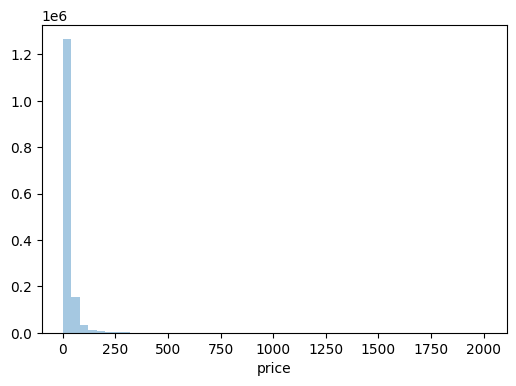

In [34]:
#target 칼럼인 price 칼럼의 데이터 분포도 살펴보기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6, 4))
sns.distplot(y_train_df, kde=False)

<ipython-input-35-57939f26a8b7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

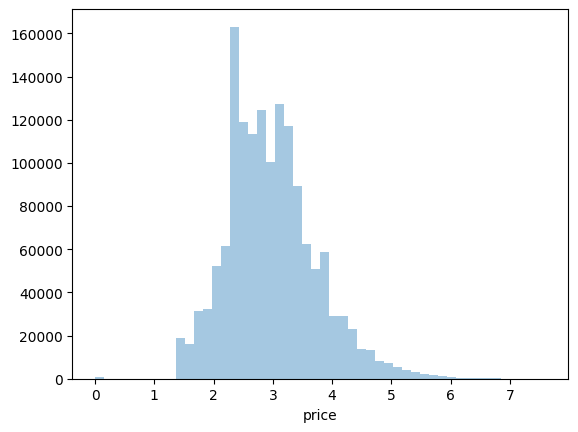

In [35]:
#price 값을 로그 변환한 뒤 분포도 살펴보기
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

-> 로그 값으로 변환하면 price 값이 비교적 정규 분포에 가까움

In [36]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [37]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [38]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

item_description이 No description yet으로 되어있는 로우가 82489건임. 이 경우도 Null과 마찬가지로 의미 있는 속성 값으로는 사용될 수 없음 -> 적절한 값으로 변경

In [39]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 변환
def split_cat(category_name):
  try:
    return category_name.split('/')
  except:
    return ['Other_Null', 'Other_Null', 'Other_Null']

# 위의 split_cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형: \n', mercari_df['cat_dae'].value_counts())
print("중분류 개수 :", mercari_df['cat_jung'].nunique())
print('소분류 개수 :', mercari_df['cat_so'].nunique())

대분류 유형: 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수 : 114
소분류 개수 : 871


대분류의 경우 Women, beauty, kids등의 분류가 매우 많고, 중분류 유형은 114개, 소분류는 817개로 구성돼있음


In [40]:
#brand_name, category_name, item_description 칼럼의 null은 일괄적으로 other null로 변경
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

# 각 칼럼별로 Null 값 건수 확인. 모두 0이 나와야 함
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 피처 인코딩과 피처 벡터화

예측 모델 : 상품 가격을 예측해야 하므로 회귀 모델을 기반으로 함

선형 회귀 모델과 회귀 트리 모델을 모두 적용할 예정임. 특히 선형 회귀의 경우 원핫 인코딩 적용이 훨씬 선호되므로 인코딩할 피처는 원핫 인코딩을 적용할 거임.

피처 벡터화 : 짧은 텍스트 -> count 기반, 긴 텍스트 -> TF-IDF 기반의 벡터화

In [41]:
print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


-> 대부분 명료한 문자열로 되어있어 별도의 피처 벡터화 형태로 만들 필요 없이 인코딩 변환 적용

In [42]:
print('name 의 종류 개수 :', mercari_df['name'].nunique())
print('name sample 10건 : \n', mercari_df['name'][:10])

name 의 종류 개수 : 1225273
name sample 10건 : 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


-> 종류가 매우 많음. 유형이 매우 많고 적은 단어 위주의 텍스트 형태로 되어있으므로 count 기반의 피처 벡터화 변환을 적용

In [43]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 크기
print('item_description의 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description의 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

-> 평균 문자열이 145자로 비교적 크므로 해당 칼럼은 TF-IDF로 변환

In [44]:
# name 속성에 대한 피처 벡터화 변환 - CountVectorizer
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description에 대한 피처 벡터화 변환 - TfidfVectorizer
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


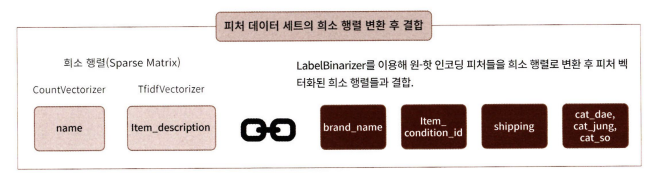

In [45]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [46]:
#제대로 변환됐는지 데이터 세트의 타입과 shape 살펴보기
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [47]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, \
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으며 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


0

###릿지 회귀 모델 구축 및 평가

모델 평가 지표 : RMSLE -> RMSE와 유사하나 오류 값에 로그를 취해 RMSE를 구하는 방식임. 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해서 해당 방식 도입함

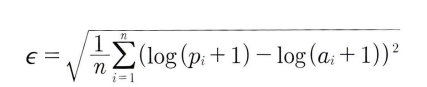

주의사항 : 학습할 모델이 사용할 price 값은 로그 값으로 변환된 price 값이므로 예측도 당연히 로그로 변환한 데이터 값 수준의 price를 예측할 것임. -> 학습 모델을 이용한 예측된 price 값은 다시 로그의 역변환인 지수 변환을 수행해 원복해야 함.

In [48]:
def rmsle(y, y_pred):
    # underflow, overflow를 막기 위해 ㅣog아닌 ㅣog1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):

    # 원본 데이터는 log1p로 변환되었으므로 exmpm1로 원복 필요
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)

    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [49]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    # scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()

    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'],
                                                        test_size=0.2, random_state=156)

    # 모델 학습 및 예측
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    del X, X_train, X_test, y_train
    gc.collect()

    return preds, y_test

In [50]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, \
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, \
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.4983990938999374
Item Description을 포함한 rmsle 값: 0.4680329023962086


Item Description을 포함했을 때 rmsle값이 많이 감소함. -> Item Description 영향이 중요함

###LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, lgbm_preds))

앞 예제의 Ridge보다 예측 성능이 더 나아짐

In [ ]:
#최종 예측 결괏값 : LightGBM의 예측 결괏값과 Ridge의 예측 결괏값을 서로 앙상블해서 구함
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:', evaluate_org_price(y_test, preds))

간단한 앙상블 방식으로 예측 성능을 더 개선함